In [1]:
# 获取当前工作目录
import os

current_directory = os.getcwd()

print("当前工作目录:", current_directory)

当前工作目录: D:\Data\Shap


In [2]:
import pandas as pd
          
import numpy as np

import matplotlib.pyplot as plt
          
from sklearn.model_selection import train_test_split          

In [3]:
# 设置字体为新罗马数字
plt.rcParams['font.family'] = 'Times New Roman'

# 处理负号          
plt.rcParams['axes.unicode_minus'] = False

# 忽略警告
import warnings
          
warnings.filterwarnings("ignore")

In [4]:
# 读取数据
df = pd.read_csv('data.csv')
# 删除 NaN 值
df.dropna(inplace=True)

In [5]:
# 划分特征和目标变量 
# 删除 'target' 列
X = df.drop(['target'], axis=1)        
# 获取 'target' 列作为目标变量
y = df['target']    

In [6]:
# 划分训练集和测试集      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df['target'])
# 观察前几行
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   57    0   4       140   241    0        0      123      1      0.2   
293   45    1   1       110   264    0        0      132      0      1.2   
294   68    1   4       144   193    1        0      141      0      3.4   
295   57    1   4       130   131    0        0      115      1      1.2   
296   57    0   2       130   236    0        2      174      0      0.0   

     slope  ca  thal  target  
0        3   0     1       0  
1        2   3     0       1  
2        2   2     2       1  
3        3   0     0       0  
4        1   0     0       0  
..     ...  ..   ...     ...  
292      2   0     2       1  
293      2   0     2       1  
294      2   2     2       1  
295      2   1     2       1  
296      2   1     0       1  

[297 rows x 14 columns]

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
# 模型的构建与训练

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# 获取决策树模型的特征贡献度（重要性）         
feature_importances = model.feature_importances_
          
# 将特征和其重要性一起排序          
sorted_indices = np.argsort(feature_importances)[::-1]  # 逆序排列，重要性从高到低
          
sorted_features = X_train.columns[sorted_indices]
          
sorted_importances = feature_importances[sorted_indices]
          
# 绘制按重要性排序的特征贡献性柱状图          
plt.figure(figsize=(10, 6), dpi=1200) 
          
# 使用渐变色，确保最高值为红色
bars = plt.barh(sorted_features, sorted_importances, color="steelblue")

# 添加坐标轴标签
plt.xlabel('Importance',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'DT',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件       
plt.gca().invert_yaxis()
          
plt.savefig("Feature_importance_DT.pdf", format='pdf',bbox_inches='tight')
          
# 显示图表          
plt.show()

In [11]:
# 基于模型创建可解释器

import shap

# 创建Explainer

explainer = shap.TreeExplainer(model, X_test)

# 以numpy数组的形式输出SHAP值

shap_values = explainer.shap_values(X_test)

print(shap_values)                 # shap_values = shap_obj.values

[[[ 0.08126984 -0.08126984]
  [ 0.          0.        ]
  [ 0.09015873 -0.09015873]
  ...
  [ 0.01265873 -0.01265873]
  [ 0.0593254  -0.0593254 ]
  [ 0.04126984 -0.04126984]]

 [[ 0.09944444 -0.09944445]
  [ 0.00083333 -0.00083333]
  [-0.02333333  0.02333333]
  ...
  [ 0.03055556 -0.03055556]
  [ 0.2025     -0.2025    ]
  [ 0.10222222 -0.10222222]]

 [[-0.04333332  0.04333334]
  [-0.01805556  0.01805556]
  [ 0.13861111 -0.13861111]
  ...
  [-0.01361111  0.01361111]
  [ 0.06805556 -0.06805556]
  [ 0.11527778 -0.11527778]]

 ...

 [[ 0.07527778 -0.07527778]
  [ 0.          0.        ]
  [ 0.24027778 -0.24027778]
  ...
  [ 0.00055556 -0.00055556]
  [-0.07138889  0.07138889]
  [ 0.06138889 -0.06138889]]

 [[ 0.06611111 -0.06611111]
  [ 0.          0.        ]
  [ 0.20277778 -0.20277778]
  ...
  [-0.0175      0.0175    ]
  [ 0.04388889 -0.04388889]
  [ 0.03666667 -0.03666667]]

 [[ 0.0271627  -0.0271627 ]
  [-0.00083333  0.00083333]
  [-0.12156746  0.12156746]
  ...
  [-0.00061508  0.000615

In [12]:
# # 以SHAP的Explanation对象形式输出SHAP值

shap_obj = explainer(X_test)

print(shap_obj.values) 

# shap_obj[:,:,0] 代表表示所有样本所有特征第1类别的shap值

# shap_obj[:,:,1] 代表表示所有样本所有特征第2类别的shap值

[[[ 0.08126984 -0.08126984]
  [ 0.          0.        ]
  [ 0.09015873 -0.09015873]
  ...
  [ 0.01265873 -0.01265873]
  [ 0.0593254  -0.0593254 ]
  [ 0.04126984 -0.04126984]]

 [[ 0.09944444 -0.09944445]
  [ 0.00083333 -0.00083333]
  [-0.02333333  0.02333333]
  ...
  [ 0.03055556 -0.03055556]
  [ 0.2025     -0.2025    ]
  [ 0.10222222 -0.10222222]]

 [[-0.04333332  0.04333334]
  [-0.01805556  0.01805556]
  [ 0.13861111 -0.13861111]
  ...
  [-0.01361111  0.01361111]
  [ 0.06805556 -0.06805556]
  [ 0.11527778 -0.11527778]]

 ...

 [[ 0.07527778 -0.07527778]
  [ 0.          0.        ]
  [ 0.24027778 -0.24027778]
  ...
  [ 0.00055556 -0.00055556]
  [-0.07138889  0.07138889]
  [ 0.06138889 -0.06138889]]

 [[ 0.06611111 -0.06611111]
  [ 0.          0.        ]
  [ 0.20277778 -0.20277778]
  ...
  [-0.0175      0.0175    ]
  [ 0.04388889 -0.04388889]
  [ 0.03666667 -0.03666667]]

 [[ 0.0271627  -0.0271627 ]
  [-0.00083333  0.00083333]
  [-0.12156746  0.12156746]
  ...
  [-0.00061508  0.000615

In [17]:
print(shap_obj[:,:,0]) 

.values =
array([[ 8.12698389e-02,  0.00000000e+00,  9.01587293e-02,
         4.88888891e-02,  3.26587298e-02,  0.00000000e+00,
         3.50000003e-02, -1.16666671e-02,  0.00000000e+00,
         7.71031765e-02,  1.26587307e-02,  5.93253971e-02,
         4.12698413e-02],
       [ 9.94444404e-02,  8.33333346e-04, -2.33333322e-02,
         1.47222225e-02, -2.83333339e-02,  0.00000000e+00,
         1.75000005e-02,  2.50000004e-03,  0.00000000e+00,
         4.80555577e-02,  3.05555565e-02,  2.02500004e-01,
         1.02222224e-01],
       [-4.33333248e-02, -1.80555561e-02,  1.38611109e-01,
         3.25000008e-02, -2.27777791e-02,  0.00000000e+00,
         0.00000000e+00,  2.50000004e-03,  0.00000000e+00,
         2.07500004e-01, -1.36111116e-02,  6.80555556e-02,
         1.15277781e-01],
       [-1.30793650e-01,  3.61111127e-03,  1.01349209e-01,
         2.57936530e-03,  2.99960321e-01,  0.00000000e+00,
        -4.33333346e-02, -1.41666669e-02,  0.00000000e+00,
         6.62698466e-03,  1

In [13]:
# 宽度为 10 英寸，高度为 5 英寸,分辨率为1200

plt.figure(figsize=(10, 5), dpi=1200)
          
# 绘制蜂群图，并设置 show=False 以避免直接显示 

shap.plots.beeswarm(shap_obj[:,:,1], show=False,max_display=13)
   
# 开启网格线

plt.grid(visible=True, linestyle='--', color='gray', alpha=0.1)  

# 添加坐标轴标签

plt.xlabel('Shap value (impact on AHC)',fontsize=10,fontweight='bold')

plt.ylabel('',fontsize=10,fontweight='bold')

# 设置x轴和y轴的刻度标签字体大小

plt.tick_params(axis='both', labelsize=8)  

# 设置标题

plt.title(f'',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件

plt.savefig(f"Shap_beeswarm_DT.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()


In [15]:
# 设置 max_display 值

max_display = 13

# 创建图形

plt.figure(figsize=(10, 5), dpi=1200)

# 创建 SHAP 值条形图，并使用 max_display 参数限制最多显示的特征数量

shap.plots.bar(shap_obj[:,:,0], max_display=max_display, show=False)

# 获取当前图形的 Axes

ax = plt.gca()

# 隐藏条形图后面的数字

for text in ax.texts:
    text.set_visible(False)

# 获取 SHAP 值并进行排序

shap_values_sorted = shap_obj[:,:,0].values.flatten()

sorted_indices = np.argsort(shap_values_sorted)[::-1]  # 逆序排列

sorted_shap_values = shap_values_sorted[sorted_indices][:max_display]

# 创建从蓝色到红色的渐变色

colors = plt.cm.autumn(np.linspace(0, 1, max_display))

# 应用颜色到条形图

for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])

# 添加坐标轴标签

plt.xlabel('Mean SHAP value (average impact on AHC)',fontsize=10,fontweight='bold')

plt.ylabel('',fontsize=10,fontweight='bold')

# 设置x轴和y轴的刻度标签字体大小

plt.tick_params(axis='both', labelsize=8)  

# 设置标题

plt.title(f'',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件

plt.savefig(f"Shap_importance_DT.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()


In [18]:
plt.figure(figsize=(10, 5), dpi=1200)
          
# 绘制第1个样本的 SHAP 瀑布图，并设置 show=False 以避免直接显示
          
shap.plots.waterfall(shap_obj[:,:,0][1], show=False, max_display=13)

# 设置坐标轴刻度标签的字体大小
plt.tick_params(axis='both', labelsize=8)  # 设置x轴和y轴的刻度标签字体大小

# 设置标题
plt.title(f'DT',loc='left', fontsize=10, fontweight='bold')
          
# 保存图像为 PDF 文件        
plt.savefig("SHAP_waterfall_DT.pdf", format='pdf', bbox_inches='tight')
          
plt.tight_layout()
          
plt.show()

In [19]:
plt.figure(figsize=(10, 5), dpi=1200)
          
# 创建 SHAP 值条形图，展示数据 

shap.plots.bar(shap_obj[:,:,0][1], show_data=True, show=False, max_display=13)
          
# 添加坐标轴标签

plt.xlabel('Shaply',fontsize=10,fontweight='bold')

plt.ylabel('Feature',fontsize=10,fontweight='bold')

# 设置x轴和y轴的刻度标签字体大小

plt.tick_params(axis='both', labelsize=8)  

# 设置标题

plt.title(f'DT',loc='left', fontsize=10, fontweight='bold')

# 保存图像为 PDF 文件 

plt.savefig("SHAP_bar_DT.pdf", format='pdf', bbox_inches='tight')
          
plt.tight_layout()
          
plt.show()

<Figure size 1000x600 with 0 Axes>

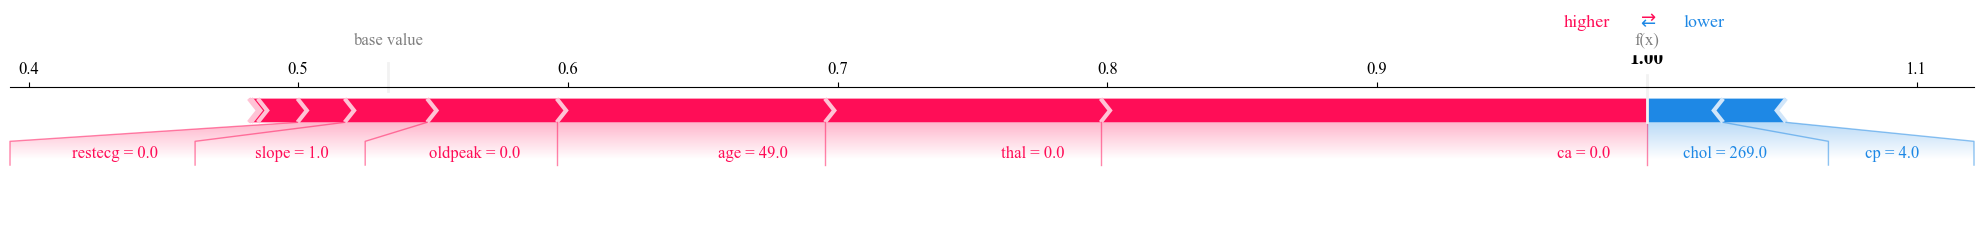

In [20]:
# 设置全局字体大小

plt.rcParams.update({'font.size': 12})

# 调整图形尺寸

plt.figure(figsize=(10, 6))  

# 创建力图

shap.force_plot(shap_obj[:,:,0][1],matplotlib=True,show=False)

plt.savefig("SHAP_force_DT.pdf", format='pdf', bbox_inches='tight')

plt.tight_layout()

plt.show()